<a href="https://colab.research.google.com/github/finr/data-analysis-class/blob/master/05_Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Acesso ao sistema de arquivos

In [1]:
import pandas as pd
#from gcsfs import GCSFileSystem
from s3fs import S3FileSystem

#gcs = GCSFileSystem(token='cloud', access='read_only')
s3 = S3FileSystem(anon=True)

details = s3.ls('cesarschool-data-samples/sample01')
print(details)

['cesarschool-data-samples/sample01/', 'cesarschool-data-samples/sample01/sample01-000000000000', 'cesarschool-data-samples/sample01/sample01-000000000001', 'cesarschool-data-samples/sample01/sample01-000000000002', 'cesarschool-data-samples/sample01/sample01-000000000003', 'cesarschool-data-samples/sample01/sample01-000000000004', 'cesarschool-data-samples/sample01/sample01-000000000005', 'cesarschool-data-samples/sample01/sample01-000000000006', 'cesarschool-data-samples/sample01/sample01-000000000007', 'cesarschool-data-samples/sample01/sample01-000000000008', 'cesarschool-data-samples/sample01/sample01-000000000009', 'cesarschool-data-samples/sample01/sample01-000000000010', 'cesarschool-data-samples/sample01/sample01-000000000011', 'cesarschool-data-samples/sample01/sample01-000000000012', 'cesarschool-data-samples/sample01/sample01-000000000013', 'cesarschool-data-samples/sample01/sample01-000000000014', 'cesarschool-data-samples/sample01/sample01-000000000015', 'cesarschool-data

## `DataFrames`
### Carregamento do primeiro arquivo do diretório

In [0]:
with s3.open(details[1], 'rb') as f:
    df = pd.read_csv(f)
    

### Formato do `DataFrame`

In [3]:
# Tupla (num_linhas, num_colunas)
print(df.shape)
print(df.columns)

(5003763, 5)
Index(['timestamp', 'user_id', 'lat', 'lng', 'country_code'], dtype='object')


### Restrição de linhas

In [0]:
# Carregamento do primeiro arquivo do diretório
# Restrição de linhas carregadas
with s3.open(details[1], 'rb') as f:
    df = pd.read_csv(f, nrows=100)

In [5]:
print(df.shape)
print(df.columns)

(100, 5)
Index(['timestamp', 'user_id', 'lat', 'lng', 'country_code'], dtype='object')


### Primeiras n linhas

In [6]:
# Padrão: 5 linhas
print(df.head())

             timestamp  ... country_code
0  2016-09-24 08:12:00  ...           US
1  2016-09-30 08:14:00  ...           US
2  2016-03-28 19:01:00  ...          NaN
3  2020-11-16 12:57:00  ...           US
4  2016-03-02 20:43:00  ...          NaN

[5 rows x 5 columns]


### Últimas n linhas

In [7]:
# Padrão: 5 linhas
print(df.tail())

              timestamp  ... country_code
95  2016-08-25 09:43:00  ...           MX
96  2016-12-11 00:20:00  ...           US
97  2016-09-14 10:19:00  ...           MX
98  2016-02-08 11:53:00  ...           CA
99  2016-04-16 19:04:00  ...           CA

[5 rows x 5 columns]


### Ordenação por valores de campos

In [8]:
print(df.sort_values(by='timestamp').head(2))

              timestamp  ... country_code
35  2016-01-05 09:14:00  ...           US
76  2016-01-14 19:44:00  ...           US

[2 rows x 5 columns]


In [9]:
print(df.sort_values(by='timestamp').tail())

   timestamp                               user_id  ...         lng  country_code
9        NaN  5a12ba85-a8ad-463c-bbf1-f87b5b88c888  ...  -74.439870            US
72       NaN  9ac854d2-07c1-490f-a1e6-5ec1e087edf6  ... -117.509172            US
73       NaN  63ea2289-27fa-406b-a188-b42e477f16a1  ...  -75.088118            US
74       NaN  3dbdf23c-3c01-401d-9e38-fbca5f362826  ... -113.844129            CA
81       NaN  ae3814c2-a465-42d6-9d40-6e5c5ac4a0ca  ...  -96.971736            US

[5 rows x 5 columns]


In [10]:
print(df.head())

             timestamp  ... country_code
0  2016-09-24 08:12:00  ...           US
1  2016-09-30 08:14:00  ...           US
2  2016-03-28 19:01:00  ...          NaN
3  2020-11-16 12:57:00  ...           US
4  2016-03-02 20:43:00  ...          NaN

[5 rows x 5 columns]


In [11]:
df.sort_values(by='timestamp', inplace=True)
print(df.head())

              timestamp  ... country_code
35  2016-01-05 09:14:00  ...           US
76  2016-01-14 19:44:00  ...           US
79  2016-01-16 09:21:00  ...           US
8   2016-01-23 09:40:00  ...           CA
41  2016-01-30 19:19:00  ...           US

[5 rows x 5 columns]


### Seleção de colunas

In [0]:
df_select = df[['country_code', 'user_id', 'lat']]

In [24]:
df_select.shape

(100, 3)

In [25]:
df_select.head()

,country_code,user_id,lat
35,US,7df00d0e-f732-4a10-9f69-b86d27a49150,29.766882
76,US,df410942-1d65-4df0-b344-baafe64237b9,37.176933
79,US,df410942-1d65-4df0-b344-baafe64237b9,37.246933
8,CA,39fbf7fe-c19e-4aa6-a62c-570564b33e3d,46.816283
41,US,bef429cd-ef14-4afc-8bac-e2c0c746fac2,41.703392


In [26]:
df_select.tail()

,country_code,user_id,lat
9,US,5a12ba85-a8ad-463c-bbf1-f87b5b88c888,40.857149
72,US,9ac854d2-07c1-490f-a1e6-5ec1e087edf6,32.704240
73,US,63ea2289-27fa-406b-a188-b42e477f16a1,40.012414
74,CA,3dbdf23c-3c01-401d-9e38-fbca5f362826,53.525550
81,US,ae3814c2-a465-42d6-9d40-6e5c5ac4a0ca,32.860353


### Filtragem

In [27]:
df_select[df_select['country_code'] == 'CA'].head()

,country_code,user_id,lat
8,CA,39fbf7fe-c19e-4aa6-a62c-570564b33e3d,46.816283
98,CA,0bfe5d3a-b3d9-4373-833c-6ff85ff1f2e6,45.995376
22,CA,009dd0b6-ed97-4462-979c-fdd971d9363a,43.776535
27,CA,5349a433-f5a0-4606-addc-fad0c3d5c998,45.038786
84,CA,df22f564-e9e3-444d-98db-8667f2394cfd,46.856283


In [28]:
df_select[(df_select['country_code'] == 'CA') & (df_select['lat'] > 50)].head()

,country_code,user_id,lat
87,CA,591f1df7-7c35-48b7-bea1-f432b023bcfd,53.58555
74,CA,3dbdf23c-3c01-401d-9e38-fbca5f362826,53.52555


### Agrupamentos, agregações, funções

In [29]:
print(df_select.groupby('country_code'))

In [30]:
print(df_select.groupby('country_code').describe())

               lat                       ...                                 
             count       mean       std  ...        50%        75%        max
country_code                             ...                                 
CA            27.0  46.908644  2.514773  ...  46.816283  47.928900  53.585550
MX            27.0  23.036734  5.225629  ...  20.522919  25.703728  32.646682
US            41.0  34.542863  3.694474  ...  33.605099  37.246933  41.833393

[3 rows x 8 columns]


In [31]:
print(df_select.groupby('country_code')['lat'].count())

country_code
CA    27
MX    27
US    41
Name: lat, dtype: int64


In [32]:
print(df_select.groupby('country_code')['lat'].max())

country_code
CA    53.585550
MX    32.646682
US    41.833393
Name: lat, dtype: float64


In [33]:
print(df_select.groupby('country_code')['lat'].min())

country_code
CA    43.556535
MX    18.950034
US    29.571137
Name: lat, dtype: float64


In [34]:
print(df.groupby('country_code')['lat'].mean())

country_code
CA    46.908644
MX    23.036734
US    34.542863
Name: lat, dtype: float64


In [35]:
print(df_select.groupby('country_code')['user_id'].value_counts())

country_code  user_id                             
CA            009dd0b6-ed97-4462-979c-fdd971d9363a    2
              e402d645-71d4-4734-be1d-1e672eff4beb    2
              0bfe5d3a-b3d9-4373-833c-6ff85ff1f2e6    1
              1275f45a-6c72-4e38-bf27-24a842f4e496    1
              2041dbc1-6d34-4c43-adbd-69abc1f2528a    1
              25426089-c57d-4836-a29e-fd21e9da6263    1
              274b9b2a-c383-4ef9-843a-6c956b4fedb1    1
              39fbf7fe-c19e-4aa6-a62c-570564b33e3d    1
              3dbdf23c-3c01-401d-9e38-fbca5f362826    1
              455d192a-0179-4af8-a253-e8f4481b53aa    1
              473897d5-9dfb-411f-ba8a-7367d5bf4b35    1
              49cc7bac-e0ba-4f76-b6b6-3b383168286a    1
              4de91454-084e-4fe2-89d2-118ec10e5d2b    1
              5349a433-f5a0-4606-addc-fad0c3d5c998    1
              591f1df7-7c35-48b7-bea1-f432b023bcfd    1
              68efa6cb-115e-4f44-9e04-4e9245d4f089    1
              6a46e008-48fb-4c06-99f7-3c351450fb75   

In [36]:
# GroupBy.agg: aplica função para cada coluna de cada grupo.
# Neste caso existe um grupo para cada país e apenas uma coluna
# por grupo: lat

def simple_function(x):
    return x.max()

print(df_select.groupby('country_code').agg(simple_function))

                                           user_id        lat
country_code                                                 
CA            f952ed26-ed92-4433-9eb9-c3998d33dee2  53.585550
MX            ff006e0a-3947-4208-8797-e1a8bddec9f1  32.646682
US            fdadabea-cd99-4205-8b12-4c53ba420716  41.833393


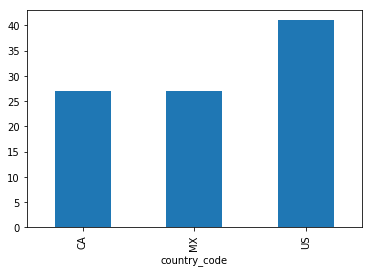

In [37]:
#Visualizando um agrupamento

%matplotlib inline
import matplotlib.pyplot as plt
plt.show(df_select.groupby('country_code')['user_id'].count().plot.bar())

## `Series`
### `Series` derivada de um `DataFrame`

In [0]:
timestamp_series = df['timestamp']

In [39]:
print(type(timestamp_series))

<class 'pandas.core.series.Series'>


In [40]:
timestamp_series[0:5]

35    2016-01-05 09:14:00
76    2016-01-14 19:44:00
79    2016-01-16 09:21:00
8     2016-01-23 09:40:00
41    2016-01-30 19:19:00
Name: timestamp, dtype: object

In [41]:
print(timestamp_series.head())

35    2016-01-05 09:14:00
76    2016-01-14 19:44:00
79    2016-01-16 09:21:00
8     2016-01-23 09:40:00
41    2016-01-30 19:19:00
Name: timestamp, dtype: object


In [42]:
timestamp_series = pd.to_datetime(timestamp_series)
print(timestamp_series.tail())

9    NaT
72   NaT
73   NaT
74   NaT
81   NaT
Name: timestamp, dtype: datetime64[ns]


In [43]:
print(timestamp_series.max())

2025-10-22 08:55:00


In [44]:
print(timestamp_series.min())

2016-01-05 09:14:00


In [45]:
print(timestamp_series.nlargest(2))

53   2025-10-22 08:55:00
32   2025-08-23 18:57:00
Name: timestamp, dtype: datetime64[ns]


In [46]:
timestamp_series = pd.to_datetime(timestamp_series)
print(timestamp_series.nlargest())

53   2025-10-22 08:55:00
32   2025-08-23 18:57:00
34   2025-05-04 21:38:00
92   2024-02-12 21:05:00
88   2022-04-02 20:24:00
Name: timestamp, dtype: datetime64[ns]


In [47]:
len(timestamp_series)

100

In [48]:
len(timestamp_series.drop_duplicates())

96